# Analysis of CC and AGN for PN Large Window Mode



In [45]:
import os
import glob

import numpy as np

from astropy.table import Table, Column, vstack

%matplotlib inline

import matplotlib.pylab as plt
#from matplotlib.patches import Patch
#from matplotlib.lines import Line2D

import seaborn as sns
sns.set(style="white")

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
#
wdir = "/xdata/xcaldata/XMM/IVAN/PN_LW/sources"
os.chdir(wdir)

In [39]:
#
# define the targets and their redshift
#
targets = ["ngc3227","mkn1040","mkn915","ngc6814",'mkn883','tycho', 'ngc5899','ngc526a']
colors = {"ngc3227":'red',"mkn1040":'green',"mkn915":'blue',"ngc6814":'magenta','mkn883':'cyan','tycho': 'brown',
         'ngc5899': 'lime', 'ngc526a': 'orange'}
#
# redshifts
#
redshift = {'ngc4151': 0.003262, 'ngc3227': 0.00386, 'mrk1048': 0.0427, 'ngc3783': 0.009755,\
            'ngc4593': 0.008344, 'ngc5506': 0.00589, 'mcg-5-23-16': 0.008226, 'ngc3516': 0.008816,\
            'ngc5548': 0.01627, 'ngc2992':  0.007296, 'ngc1566': 0.005036, 'iras09149': 0.057150,\
            "iras05078": 0.017879, 'ngc7213': 0.005869,"mkn915": 0.024043,"mkn1040":0.016338,\
            "ngc6814": 0.005227, 'mkn883': 0.03787, 'tycho': 0.0, 'ngc5899': 0.00880, 'ngc526a': 0.01897}
feK = 6.399 # the weighted mean of Fe Kalpha_2 at 6.3908 (intensity 50) and Fe Kalpha_1 at 6.40308 (intensity 100)

Adding ngc3227
Adding mkn1040
Adding mkn915
Adding ngc6814
Adding mkn883
Adding tycho
Adding ngc5899
Adding ngc526a
Adding ngc3227
Adding mkn1040
Adding mkn915
Adding ngc6814
Adding mkn883
Adding tycho
Adding ngc5899
Adding ngc526a


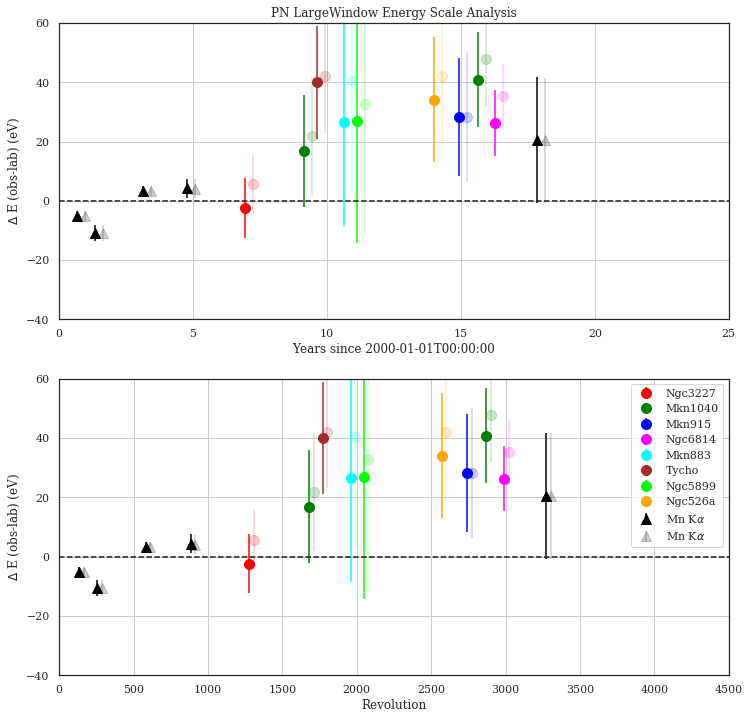

In [68]:
#
# calculate the differences and plot
# save some info in a tex table
#
all_diffs = []
xrtime = []
msize=10
xcols = {}
fig = plt.figure(figsize=(12,12))
(ax,ax2) = fig.subplots(2,1)
#vers = "cti48"
vers = "cti49"
k = 0
for target in targets:
    print (f"Adding {target}")
    out_tab = f'{target}/output_xspec_{vers}.csv'
    if (not os.path.isfile(out_tab)):
        print (f"No CTI{vers} results found for target {target}: {out_tab}")
        continue
    t = Table.read(out_tab,data_start=0,names=("obsid","expo","rev","delta_time","submode",\
                                  "xfilt","inst","ontime","ccd",\
                                  "lineE","lineE_err","cstat","chi2r","dof"))
    nt = len(t)
    #
    lineX =  feK/(1.0 + redshift[target]) # redshifted line position
    rev = t['rev'].data
    rtime = t['delta_time'].data
    xrtime = np.concatenate((xrtime,rtime))
    inst = t['inst'].data
    line = t['lineE'].data
    lineErr = t['lineE_err'].data
    rchi2 = t["chi2r"].data
    diff = (line - lineX)*1000.0
    errs = [lineErr*1000,lineErr*1000.0]
    #
    # add to output table
    #
    t['target'] = Column(target)
    t['redshift'] = Column(redshift[target])
    t['deltaE'] = Column(diff)
    t['deltaE'].format = '.1f'
    t['deltaE_err'] = Column(errs[0])
    t['obsid'].format = '010'
    if (k == 0):
        tx = t
        k = 1
    else:
        tx = vstack([tx,t])
    #
    symb = 'o'
    ax.errorbar(rtime,diff,yerr=(errs),fmt=symb,color=colors[target],\
               markersize=msize,label=target.capitalize())
    ax2.errorbar(rev,diff,yerr=(errs),fmt=symb,color=colors[target],\
               markersize=msize,label=target.capitalize())
    #
#
vers = "cti48"
for target in targets:
    print (f"Adding {target}")
    out_tab = f'{target}/output_xspec_{vers}.csv'
    if (not os.path.isfile(out_tab)):
        print (f"No CTI{vers} results found for target {target}: {out_tab}")
        continue
    t = Table.read(out_tab,data_start=0,names=("obsid","expo","rev","delta_time","submode",\
                                  "xfilt","inst","ontime","ccd",\
                                  "lineE","lineE_err","cstat","chi2r","dof"))
    nt = len(t)
    #
    lineX =  feK/(1.0 + redshift[target]) # redshifted line position
    rev = t['rev'].data
    rtime = t['delta_time'].data
    xrtime = np.concatenate((xrtime,rtime))
    inst = t['inst'].data
    line = t['lineE'].data
    lineErr = t['lineE_err'].data
    rchi2 = t["chi2r"].data
    diff = (line - lineX)*1000.0
    errs = [lineErr*1000,lineErr*1000.0]
    symb = 'o'
    ax.errorbar(rtime+0.3,diff,yerr=(errs),fmt=symb,color=colors[target],\
               markersize=msize,label="",alpha=0.2)
    ax2.errorbar(rev+30,diff,yerr=(errs),fmt=symb,color=colors[target],\
               markersize=msize,label="",alpha=0.2)
    #ax.errorbar(rtime+0.3,diff,yerr=(errs),fmt=symb,color=colors[target],\
    #           markersize=msize,label=f"{target.capitalize()}(v48)",alpha=0.2)
    #ax2.errorbar(rev+30,diff,yerr=(errs),fmt=symb,color=colors[target],\
    #           markersize=msize,label=f"{target.capitalize()}(v48)",alpha=0.2)
#
ax.axhline(0.0,color='k',ls='dashed')
#ax.set_ylabel(r"Fe Line Energy (keV)")
ax.set_ylabel(r"$\Delta$ E (obs-lab) (eV)")
ax.set_xlabel(r"Years since 2000-01-01T00:00:00")
#ax.set_title("{} Analysis".format(target.capitalize()))
ax.grid(True)
#
# add the calclosed data
#
vers = "cti49"
ccdir = "/xdata/xcaldata/XMM/IVAN/PN_LW/CalClosed"
cc_files = glob.glob(f"{ccdir}/*_xspec_results_{vers}.csv")
mnka_lab = 5.8988
cclab = r"Mn K$\alpha$"
k = 0
for jj in cc_files:
    tcc = Table.read(jj)
    rtime_cc = tcc['delta_time'].data
    rev_cc = tcc['rev'].data
    mnka = tcc['line2'].data
    mnka_err = 1000*tcc['line2err'].data
    cc_diff = 1000*(mnka - mnka_lab)
    ix = np.where(tcc['ccd'] == 4.2)[0]
    ax.errorbar(rtime_cc[ix],cc_diff[ix],yerr=(mnka_err[ix]),fmt="^",\
               markersize=msize,color='black',label=cclab)
    ax2.errorbar(rev_cc[ix],cc_diff[ix],yerr=(mnka_err[ix]),fmt="^",\
               markersize=msize,color='black',label=cclab)
    cclab = ""
    #
    # add to output table
    #
    tcc['deltaE'] = Column(cc_diff)
    tcc['deltaE'].format = '.1f'
    tcc['deltaE_err'] = Column(mnka_err)
    tcc['obsid'].format = '010'
    if (k == 0):
        ty = tcc
        k = 1
    else:
        ty = vstack([ty,tcc])
#    
vers = "cti48"
ccdir = "/xdata/xcaldata/XMM/IVAN/PN_LW/CalClosed"
cc_files = glob.glob(f"{ccdir}/*_xspec_results_{vers}.csv")
mnka_lab = 5.8988
cclab = r"Mn K$\alpha$"
for jj in cc_files:
    tcc = Table.read(jj)
    rtime_cc = tcc['delta_time'].data
    rev_cc = tcc['rev'].data
    mnka = tcc['line2'].data
    mnka_err = 1000*tcc['line2err'].data
    cc_diff = 1000*(mnka - mnka_lab)
    ix = np.where(tcc['ccd'] == 4.2)[0]
    ax.errorbar(rtime_cc[ix]+0.3,cc_diff[ix],yerr=(mnka_err[ix]),fmt="^",\
               markersize=msize,color='black',label=cclab,alpha=0.2)
    ax2.errorbar(rev_cc[ix]+30,cc_diff[ix],yerr=(mnka_err[ix]),fmt="^",\
               markersize=msize,color='black',label=cclab,alpha=0.2)
    cclab = ""
ax2.axhline(0.0,color='k',ls='dashed')
#ax.set_ylabel(r"Fe Line Energy (keV)")
ax2.set_ylabel(r"$\Delta$ E (obs-lab) (eV)")
ax2.set_xlabel(r"Revolution")
ax2.grid(True)
ax.set_ylim([-40.0,60.0])
ax2.set_ylim([-40.0,60.0])
ax.set_xlim([0.0,25.0])
ax2.set_xlim([0.0,4500.0])
#ax.set_title(f"PN SmallWindow Energy Scale Analysis\n Test #{ver}")
ax.set_title(f"PN LargeWindow Energy Scale Analysis")
plt.legend(numpoints=1)
#plt.savefig('{}/pn_sw_cti49_results_control.png'.format(wdir),dpi=100)
plt.savefig(f'{wdir}/pn_lw_cti48_cti49_results.png',dpi=100)
plt.show()
plt.close()
#

In [71]:
tout = tx["target","redshift","obsid","expo","rev","delta_time","ontime","lineE","lineE_err","deltaE","deltaE_err",
  "cstat","chi2r","dof"]
tout.write(f"{wdir}/targets_table.tex", format='latex',overwrite = True)

In [72]:
tout

target,redshift,obsid,expo,rev,delta_time,ontime,lineE,lineE_err,deltaE,deltaE_err,cstat,chi2r,dof
str7,float64,int64,str4,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64
ngc3227,0.00386,0400270101,S003,1279,6.9263,93.6,6.372,0.01,-2.4,10.0,852.4,1.0927,794
mkn1040,0.016338,0554990101,S001,1682,9.1281,66.5,6.313,0.019,16.9,19.0,852.1,1.1132,794
mkn1040,0.016338,0760530201,S001,2871,15.6257,84.5,6.337,0.016,40.9,16.0,848.3,1.0999,794
mkn915,0.024043,0744490401,S003,2744,14.9304,85.8,6.277,0.02,28.2,20.0,791.4,1.0723,794
ngc6814,0.005227,0764620101,S001,2991,16.2801,103.1,6.392,0.011,26.3,11.0,872.0,1.1303,794
mkn883,0.03787,0652550201,S013,1959,10.6422,25.8,6.192,0.035,26.5,35.0,876.4,0.8528,794
tycho,0.0,0412380401,S003,1773,9.6251,29.4,6.439,0.019,40.0,19.0,811.1,0.773,794
ngc5899,0.0088,0651850501,S003,2048,11.1277,18.2,6.37,0.041,26.8,41.0,832.0,1.4721,794
ngc526a,0.01897,0721730301,S003,2570,13.9822,48.5,6.314,0.021,34.1,21.0,831.7,1.1141,794


In [67]:
ty

obsid,expo,rev,delta_time,submode,xfilt,inst,ontime,ccd,line1,line1err,cstat1,chi2r1,dof1,line2,line2err,line3,line3err,cstat2,chi2r2,dof2,line4,line4err,cstat3,chi2r3,dof3,comm,deltaE,deltaE_err
int64,str4,int64,float64,str16,str9,str3,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,int64,float64,float64
0203720201,S020,885,4.7766,PrimeLargeWindow,CalClosed,EPN,14.0,1.0,1.4839,0.0014,265.25,1.653,198,5.8955,0.0016,6.4838,0.0042,643.9,1.657,391,8.0832,0.0319,421.35,0.476,394,--,-3.3,1.6
0203720201,S020,885,4.7766,PrimeLargeWindow,CalClosed,EPN,14.0,2.0,1.4877,0.0014,196.21,1.155,198,5.8926,0.0018,6.4776,0.0052,560.25,1.49,391,8.0515,0.0077,476.96,0.683,394,--,-6.2,1.8
0203720201,S020,885,4.7766,PrimeLargeWindow,CalClosed,EPN,14.0,3.0,1.4822,0.0017,248.44,1.586,198,5.8902,0.0025,6.4752,0.0073,586.73,1.327,391,8.0633,0.0101,457.33,0.645,394,--,-8.6,2.5
0203720201,S020,885,4.7766,PrimeLargeWindow,CalClosed,EPN,14.0,4.0,1.4885,0.0014,226.16,1.421,198,5.9121,0.0013,6.4943,0.0034,634.97,1.759,391,8.0282,0.0222,428.02,0.499,394,--,13.3,1.3
0203720201,S020,885,4.7766,PrimeLargeWindow,CalClosed,EPN,14.0,5.0,1.4874,0.0015,259.77,1.662,198,5.9034,0.0012,6.4884,0.0033,580.68,1.436,391,8.0463,0.0109,426.93,0.657,394,--,4.6,1.2
0203720201,S020,885,4.7766,PrimeLargeWindow,CalClosed,EPN,14.0,6.0,1.4855,0.0018,256.33,1.75,198,5.9097,0.0011,6.4925,0.003,568.15,1.331,391,8.0526,0.0088,452.03,0.745,394,--,10.9,1.1
0203720201,S020,885,4.7766,PrimeLargeWindow,CalClosed,EPN,14.0,7.0,1.4877,0.0011,229.37,1.29,198,5.9029,0.0013,6.4884,0.0037,578.45,1.497,391,8.0226,0.0249,439.84,0.522,394,--,4.1,1.3
0203720201,S020,885,4.7766,PrimeLargeWindow,CalClosed,EPN,14.0,8.0,1.4849,0.0012,255.13,1.589,198,5.9032,0.0012,6.4949,0.0032,715.55,1.742,391,8.0413,0.0086,474.06,0.746,394,--,4.4,1.2
0203720201,S020,885,4.7766,PrimeLargeWindow,CalClosed,EPN,14.0,9.0,1.4835,0.0019,218.92,1.556,198,5.9005,0.0011,6.4908,0.0032,541.72,1.178,391,8.0502,0.0106,442.79,0.705,394,--,1.7,1.1


In [75]:
tyout = ty["obsid","expo","rev","delta_time","ontime","ccd","line2","line2err","deltaE","deltaE_err",
  "cstat2","chi2r2","dof2"]
tyout.write(f"{wdir}/calclosed_table.tex", format='latex',overwrite = True)